## Figure 3. The bulged GWG motif enhances Drosha-mediated processing.
- 3A. Bulge count
- 3B. In vitro processing results of pri-miRNAs with different numbers of bulges
- 3C. Bulge frequency.
- 3D. In vitro processing results of pri-miRNAs with and without a bulge.
- 3E-F. Sequence preference of the 3p bulge at -10.
- 3G. In vitro processing results of pri-miRNAs with and without the GWG bulge.
- 3H. In vitro processing results of artificial pri-miRNAs with and without the GWG bulge.

In [1]:
import time
today = time.strftime('%Y-%m-%d')
name = 'S. Chan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by S. Chan Baek at 2024-01-25.


In [2]:
import os
HOME = '/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep'
SAVEPATH = '%s/%s/'%(HOME,time.strftime('%y%m%d'))
if not os.path.exists(SAVEPATH):
    os.makedirs(SAVEPATH)
print SAVEPATH
%cd $HOME

/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep/240125/
/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep


In [3]:
from __future__ import division
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from matplotlib import gridspec, lines, colors
from scipy.stats import pearsonr, mannwhitneyu, sem
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [4]:
s1 = pd.read_csv('publication/TableS1__Pri-miRNAs_selected_for_SHAPE-MaP.csv',index_col=0)
s2 = pd.read_csv('publication/TableS2__Constructs_used_in_this_study.csv',index_col=0)
s3 = pd.read_csv('publication/TableS3_2__SHAPE_reactivity.csv',index_col=0)
s3.columns = range(1,126)
s3cnts = pd.read_csv('publication/TableS3_1__Read_counts.csv',index_col=0)
s3shan = pd.read_csv('publication/TableS3_3__Shannon_entropy.csv',index_col=0)
s3shan.columns = range(1,126)
s3shan = s3shan.fillna(0)
s4str = pd.read_csv('publication/TableS4_1__SHAPE-based_pri-miRNA_structures.csv',index_col=0)
s4str.columns = range(1,126)
s4 = pd.read_csv('publication/TableS4_2__Structural_features_of_pri-miRNAs.csv',index_col=0)
releffs = s4['Cleavage efficiency (MP)']
relhoms = s4['Cleavage homogeneity (MP)']
constseqs = s2['Construct sequence'].to_dict()
folded = list(s4.index)
print len(folded)

476


In [5]:
def get_pre_position(mir):
    constseq = constseqs[mir].replace('T','U')
    preseq = s1.loc[mir, 'Precursor']
    return constseq.find(preseq)+1, constseq.find(preseq)+len(preseq)

def split_ct(ctfile):
    infos = open(ctfile, 'rt').read()
    length = int(infos.split('\n')[0].strip().split()[0])
    rna = infos.split('\n')[0].strip().split()[-1]
    nstrt = infos.count(rna)
    splitinfos = []
    for i in range(nstrt):
        lines = infos.split('\n')[1+(1+length)*i:(1+length)*(i+1)]
        splitinfos.append([ tuple(map(int,l.strip().split()[4:6][::-1])) for l in lines ])
    return splitinfos

### 3A. Bulge counts

In [14]:
bulged = {}
for m in folded:
    symstr = features.loc[m,'structure']
    aj5,aj3,bj5,bj3 = features.loc[m,['AJ5','AJ3','BJ5','BJ3']].astype(int)
    bulged[m] = (symstr[bj5-1:aj5]+symstr[aj3-1:bj3]).count('A')
print Counter(bulged.values())

Counter({2: 111, 0: 86, 1: 85, 3: 65, 4: 47, 5: 29, 6: 20, 7: 14, 8: 7, 9: 4, 11: 4, 10: 2, 13: 2})


In [6]:
bins = [(0,0),(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7),(8,50)]
xs = range(0,9)
ys = [len([m for m in folded if lb<=s4.loc[m,['5p bulges','3p bulges']].sum()<=ub]) for lb,ub in bins]
ys = np.array(ys)/len(folded)*100
print ys

[18.06722689 17.85714286 23.31932773 13.65546218  9.87394958  6.09243697
  4.20168067  2.94117647  3.99159664]


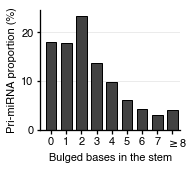

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(2.5,2.2))
ax.bar(xs,ys,color='#424242',width=.7,edgecolor='k',lw=1,zorder=2)

ax.set_xlabel('Bulged bases in the stem')
ax.set_ylabel('Pri-miRNA proportion (%)')
ax.set_xticks(xs)
ax.set_xticklabels(xs[:-1]+['   $\geq$8'])
ax.set_yticks([0,10,20])
ax.set_xlim(min(xs)-.7,max(xs)+.5)
ax.yaxis.grid(ls='-',lw=.5)
#fig.savefig(resultpath+'230228_s3__bulge_count.pdf')

### 3B. In vitro processing results of pri-miRNAs with different numbers of bulges

In [8]:
bins = [(0,1),(2,3),(4,5),(6,7),(8,30)]
msl = [[m for m in folded if lb<=s4.loc[m,['5p bulges','3p bulges']].sum()<=ub] for lb,ub in bins]
pes = [[releffs[m] for m in ms] for ms in msl]
phs = [[relhoms[m] for m in ms] for ms in msl]
xs = np.arange(len(bins))
ys1 = map(np.average,pes)
es1 = map(sem,pes)
ys2 = map(np.average,phs)
es2 = map(sem,phs)
labels = ['0-1','2-3','4-5','6-7','$\geq$8']
print mannwhitneyu(pes[0],pes[1]+pes[2]+pes[3]+pes[4])[1]*2
print mannwhitneyu(phs[0],phs[1]+phs[2]+phs[3]+phs[4])[1]*2
labels = ['%s\n(%s)'%(l,len(pe)) for l,pe in zip(labels,pes)]

0.009497202580893834
0.03072219464596543


Text(0,0.5,u'Cleavage homogeneity')

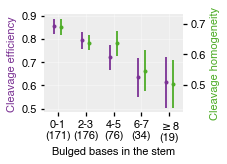

In [9]:
fig,ax = plt.subplots(1,1,figsize=(2.5,1.8))

ax.errorbar(xs-.12,ys1,yerr=es1,lw=0,elinewidth=1.8,ms=3,marker='o',color='#7b3294')
axt = ax.twinx()
axt.errorbar(xs+.12,ys2,yerr=es2,lw=0,elinewidth=1.8,ms=3,marker='o',color='#4dac26')
ax.set_xlim(min(xs)-.5,max(xs)+.5)
ax.set_xticks(xs)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(.5,1,.1))
ax.grid(ls='-',lw=.7,color='w')
for a in [ax,axt]:
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
ax.tick_params(left='on')
axt.tick_params(left='off',right='on')
ax.set_facecolor('#ededed')
ax.set_xlabel('Bulged bases in the stem')
ax.set_ylabel('Cleavage efficiency',color='#7b3294')
axt.set_ylabel('Cleavage homogeneity',color='#4dac26')
#fig.savefig(resultpath + '230704_s3__bulge_processing.pdf')

### 3C. Bulge frequency.

In [10]:
def get_sym_str(ctinfo, ps, pe):
    stinfo = [(x,y) for x,y in ctinfo if y>0]
    ls = [ (x,y) for i,(x,y) in enumerate(stinfo[:-1]) 
          if stinfo[i+1]==(y,x) and x>ps and y<pe ]
    loopst, loopen = min(ls, key=lambda (x,y):abs(120-x-y))
    stems = [ (i,p) for i,p in ctinfo if i<=loopst and loopen<=p ]
    if len(stems)<2:
        return 'F'*125
    stemst, stemen = stems[0]
    stems = stems + [ (p,i) for i,p in stems[::-1] ]
    symst = ''
    for (l5,l3),(u5,u3) in zip(stems[:-1],stems[1:]):
        if l5==loopst: symst += 'M'+'L'*(loopen-loopst-1)
        elif u5-l5==1: symst += 'M'
        else:
            symmet = min(u5-l5-1, l3-u3-1)
            symst += 'M' + symmet*'S' + (u5-l5-1-symmet)*'A'# + symmet*'S'
    symst = 'F'*(stemst-1) + symst + 'M' + 'F'*(125-stemen)
    return symst

In [11]:
bg5tbl = pd.DataFrame(index=folded,columns=range(-15,25))
bg3tbl = pd.DataFrame(index=folded,columns=range(-15,25))
for m in folded:
    ctinfo = list(s4str.loc[m].items())
    ps, pe = get_pre_position(m)
    symstr = get_sym_str(ctinfo, ps, pe)
    ajs, aje = map(int,s4.loc[m,'Apical junction position'].split(', '))
    bjs, bje = map(int,s4.loc[m,'Basal junction position'].split(', '))
    lstem = s4.loc[m,'Lower stem length (bp)']
    str5 = re.sub('[A]+','A',symstr[bjs-1:ajs])
    str3 = re.sub('[A]+','A',symstr[aje-1:bje][::-1])
    bgd5 = {r.start()-lstem-str5[:r.start()].count('A'):1 for r in re.finditer('MAM',str5)}
    bgd3 = {r.start()-lstem-str3[:r.start()].count('A'):1 for r in re.finditer('MAM',str3)}
    bg5tbl.loc[m] = pd.Series(bgd5)
    bg3tbl.loc[m] = pd.Series(bgd3)
bg5tbl = bg5tbl.fillna(0).astype(int)
bg3tbl = bg3tbl.fillna(0).astype(int)

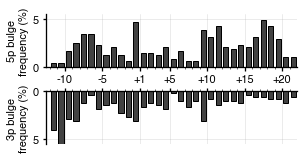

In [12]:
xs = range(-12,21)
ys1 = bg5tbl[xs].sum()/len(folded)*100
ys2 = bg3tbl[xs].sum()/len(folded)*100
xs = np.arange(-12,21)+.5
xtks = range(-10,1,5)+range(4,20,5)
xtls = range(-10,0,5)+['+1','+5','+10','+15','+20']

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4.5,2.4))
ax1.bar(xs,ys1,color='#424242',zorder=2,width=.7,edgecolor='k',lw=1)
ax2.bar(xs,ys2,color='#424242',zorder=2,width=.7,edgecolor='k',lw=1)
ax1.set_ylabel('5p bulge\nfrequency (%)',fontsize=11)
ax2.set_ylabel('3p bulge\nfrequency (%)',fontsize=11)
for ax in [ax1,ax2]:
    ax.set_xlim(-12.5,21)
    ax.set_xticks(xtks)
    ax.set_xticklabels(xtls)
    ax.set_xticks(xs-.5,minor=True)
    ax.grid(ls='-',lw=.5)
    ax.set_ylim(0,5.5)
    
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True); ax2.spines['bottom'].set_visible(False)
ax2.tick_params(bottom='off',top='on',which='both')
ax2.set_xticklabels([])
fig.subplots_adjust(hspace=.45)
#fig.savefig(resultpath + '230228_f3a__bulge_freq.pdf')

### 3B. In vitro processing results of pri-miRNAs with and without a bulge.

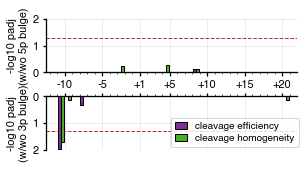

In [13]:
xs = np.arange(-12,21)
ys11 = [-np.log10(min(1,mannwhitneyu([releffs[m] for m in bg5tbl[bg5tbl[x]==1].index],
            [releffs[m] for m in bg5tbl[bg5tbl[x]==0].index])[1]*2*len(xs))) for x in xs]
ys12 = [-np.log10(min(1,mannwhitneyu([relhoms[m] for m in bg5tbl[bg5tbl[x]==1].index],
            [relhoms[m] for m in bg5tbl[bg5tbl[x]==0].index])[1]*2*len(xs))) for x in xs]
ys21 = [-np.log10(min(1,mannwhitneyu([releffs[m] for m in bg3tbl[bg3tbl[x]==1].index],
            [releffs[m] for m in bg3tbl[bg3tbl[x]==0].index])[1]*2*len(xs))) for x in xs]
ys22 = [-np.log10(min(1,mannwhitneyu([relhoms[m] for m in bg3tbl[bg3tbl[x]==1].index],
            [relhoms[m] for m in bg3tbl[bg3tbl[x]==0].index])[1]*2*len(xs))) for x in xs]
xs = np.arange(-12,21)+.5

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4.5,2.4))
ax1.bar(xs-.2,ys11,width=.4,color='#7b3294',edgecolor='k',lw=1,zorder=3)
ax1.bar(xs+.2,ys12,width=.4,color='#4dac26',edgecolor='k',lw=1,zorder=3)
ax2.bar(xs-.2,ys21,width=.4,color='#7b3294',edgecolor='k',lw=1,zorder=3,
        label='cleavage efficiency')
ax2.bar(xs+.2,ys22,width=.4,color='#4dac26',edgecolor='k',lw=1,zorder=3,
        label='cleavage homogeneity')
ax1.set_ylabel('-log10 padj\n(w/wo 5p bulge)')
ax2.set_ylabel('-log10 padj\n(w/wo 3p bulge)')
for ax in [ax1,ax2]:
    ax.axhline(-np.log10(.05),color='tab:red',lw=1,ls='--')
    ax.set_xlim(-12.5,21)
    ax.set_ylim(0,2)
    ax.set_xticks(xtks)
    ax.set_xticklabels(xtls)
    ax.set_xticks(xs-.5,minor=True)
    ax.grid(ls='-',lw=.5)
    
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True); ax2.spines['bottom'].set_visible(False)
ax2.tick_params(bottom='off',top='on',which='both')
ax2.set_xticklabels([])
ax2.legend(loc=(.5,.05),handlelength=1.2,prop={'size':10},labelspacing=.3)
fig.subplots_adjust(hspace=.45)
#fig.savefig(resultpath + '221018_f3b__bulge_processing.pdf')

### S3A. Bulge frequency with sequenc-only

In [68]:
bg5so = pd.DataFrame(index=folded,columns=range(-15,25))
bg3so = pd.DataFrame(index=folded,columns=range(-15,25))
for m in folded:
    ctinfo = split_ct('publication/structures/RNAstructure/%s.ct'%m)[0]
    stinfo = [ p for p in ctinfo if p[1]>0 ] 
    ps, pe = get_pre_position(m)
    symstr = get_sym_str(ctinfo, ps, pe)
    
    loops = [ (x,y) for i,(x,y) in enumerate(stinfo[:-1]) if stinfo[i+1]==(y,x) and x>ps and y<pe ]
    bj5,bj3 = [(i,p) for i,p in ctinfo if i<60<p][0]
    aj5,aj3 = min(loops, key=lambda (x,y):abs(120-x-y))
        
    lstem = count_len(symstr[bj5-1:ps-1])
    str5 = re.sub('[A]+','A',symstr[bj5-1:aj5])
    str3 = re.sub('[A]+','A',symstr[aj3-1:bj3][::-1])
    bgd5 = {r.start()-lstem-str5[:r.start()].count('A'):1 for r in re.finditer('MAM',str5)}
    bgd3 = {r.start()-lstem-str3[:r.start()].count('A'):1 for r in re.finditer('MAM',str3)}
    bg5so.loc[m] = pd.Series(bgd5)
    bg3so.loc[m] = pd.Series(bgd3)
bg5so = bg5so.fillna(0).astype(int)
bg3so = bg3so.fillna(0).astype(int)

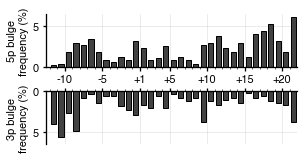

In [74]:
xs = range(-12,21)
ys1 = bg5so[xs].sum()/len(folded)*100
ys2 = bg3so[xs].sum()/len(folded)*100
xs = np.arange(-12,21)+.5
xtks = range(-10,1,5)+range(4,20,5)
xtls = range(-10,0,5)+['+1','+5','+10','+15','+20']

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4.5,2.4))
ax1.bar(xs,ys1,color='#424242',zorder=2,width=.7,edgecolor='k',lw=1)
ax2.bar(xs,ys2,color='#424242',zorder=2,width=.7,edgecolor='k',lw=1)
ax1.set_ylabel('5p bulge\nfrequency (%)',fontsize=11)
ax2.set_ylabel('3p bulge\nfrequency (%)',fontsize=11)
for ax in [ax1,ax2]:
    ax.set_xlim(-12.5,21)
    ax.set_xticks(xtks)
    ax.set_xticklabels(xtls)
    ax.set_xticks(xs-.5,minor=True)
    ax.grid(ls='-',lw=.5)
    ax.set_ylim(0,6.5)
    
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True); ax2.spines['bottom'].set_visible(False)
ax2.tick_params(bottom='off',top='on',which='both')
ax2.set_xticklabels([])
fig.subplots_adjust(hspace=.45)
#fig.savefig(resultpath + '230228_f3a__bulge_freq.pdf')

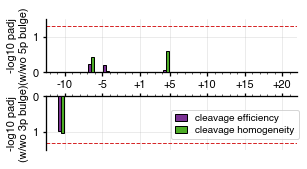

In [75]:
xs = np.arange(-12,21)
ys11 = [-np.log10(min(1,mannwhitneyu([releffs[m] for m in bg5so[bg5so[x]==1].index],
            [releffs[m] for m in bg5so[bg5so[x]==0].index])[1]*2*len(xs))) for x in xs]
ys12 = [-np.log10(min(1,mannwhitneyu([relhoms[m] for m in bg5so[bg5so[x]==1].index],
            [relhoms[m] for m in bg5so[bg5so[x]==0].index])[1]*2*len(xs))) for x in xs]
ys21 = [-np.log10(min(1,mannwhitneyu([releffs[m] for m in bg3so[bg3so[x]==1].index],
            [releffs[m] for m in bg3so[bg3so[x]==0].index])[1]*2*len(xs))) for x in xs]
ys22 = [-np.log10(min(1,mannwhitneyu([relhoms[m] for m in bg3so[bg3so[x]==1].index],
            [relhoms[m] for m in bg3so[bg3so[x]==0].index])[1]*2*len(xs))) for x in xs]
xs = np.arange(-12,21)+.5

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(4.5,2.4))
ax1.bar(xs-.2,ys11,width=.4,color='#7b3294',edgecolor='k',lw=1,zorder=3)
ax1.bar(xs+.2,ys12,width=.4,color='#4dac26',edgecolor='k',lw=1,zorder=3)
ax2.bar(xs-.2,ys21,width=.4,color='#7b3294',edgecolor='k',lw=1,zorder=3,
        label='cleavage efficiency')
ax2.bar(xs+.2,ys22,width=.4,color='#4dac26',edgecolor='k',lw=1,zorder=3,
        label='cleavage homogeneity')
ax1.set_ylabel('-log10 padj\n(w/wo 5p bulge)')
ax2.set_ylabel('-log10 padj\n(w/wo 3p bulge)')
for ax in [ax1,ax2]:
    ax.axhline(-np.log10(.05),color='tab:red',lw=1,ls='--')
    ax.set_xlim(-12.5,21)
    ax.set_ylim(0,1.5)
    ax.set_xticks(xtks)
    ax.set_xticklabels(xtls)
    ax.set_xticks(xs-.5,minor=True)
    ax.grid(ls='-',lw=.5)
    
ax2.invert_yaxis()
ax2.spines['top'].set_visible(True); ax2.spines['bottom'].set_visible(False)
ax2.tick_params(bottom='off',top='on',which='both')
ax2.set_xticklabels([])
ax2.legend(loc=(.5,.2),handlelength=1.2,prop={'size':10},labelspacing=.3)
fig.subplots_adjust(hspace=.45)
#fig.savefig(resultpath + '221018_f3b__bulge_processing.pdf')

### 3E-F. Sequence preference of the 3p bulge at -10/-11.

In [61]:
import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties
fp = FontProperties(family="Helvetica", weight="bold") 
globscale = 1.35
LETTERS = { "U" : TextPath((-0.35, 0), "U", size=1, prop=fp),
            "G" : TextPath((-0.384, 0), "G", size=1, prop=fp),
            "A" : TextPath((-0.35, 0), "A", size=1, prop=fp),
            "C" : TextPath((-0.366, 0), "C", size=1, prop=fp) }
COLOR_SCHEME = {'G': 'orange', 
                'A': 'red', 
                'C': 'blue', 
                'U': 'darkgreen'}
def letterAt(letter, x, y, yscale=1, ax=None):
    text = LETTERS[letter]
    t = mpl.transforms.Affine2D().scale(1*globscale, yscale*globscale) + \
        mpl.transforms.Affine2D().translate(x,y) + ax.transData
    p = PathPatch(text, lw=0, fc=COLOR_SCHEME[letter],  transform=t)
    if ax != None:
        ax.add_artist(p)
    return p

In [104]:
POS = -11
bg3ms = bg3tbl[bg3tbl[POS]==1].index
bg3seq = {}
for m in bg3ms:
    priseq = constseqs[m].replace('T','U')
    ctinfo = list(s4str.loc[m].items())
    ps, pe = get_pre_position(m)
    symstr = get_sym_str(ctinfo, ps, pe)
    ajs, aje = map(int,s4.loc[m,'Apical junction position'].split(', '))
    bjs, bje = map(int,s4.loc[m,'Basal junction position'].split(', '))
    lstem = s4.loc[m,'Lower stem length (bp)']
    str3 = symstr[aje-1:bje][::-1]
    seq3 = priseq[aje-1:bje][::-1]
    for r in re.finditer('M[A]+M',str3):
        pos = r.start()-lstem-str3[:r.start()].count('A')
        if pos == POS:
            s,e = r.span()
            s3p,e3p = bje-s,bje-e+1
            s5p,e5p = s4str.loc[m,[s3p,e3p]]
            
            bp11 = priseq[s5p-1]+priseq[s3p-1]
            bp10 = priseq[e5p-1]+priseq[e3p-1]
            bulge = priseq[e3p:s3p-1]
            bg3seq[m] = (bp11, bp10, bulge)

In [107]:
PAIRS = ['CG','GC','AU','UA','GU','UG']
bps11 = [bg3seq[m][0] for m in bg3ms]
data = [bps11.count(bp) for bp in PAIRS]
print zip(PAIRS,data)
colors = ['#8da0cb','#8da0cb','#66c2a5','#66c2a5','#fc8d62','#fc8d62']

[('CG', 12), ('GC', 6), ('AU', 3), ('UA', 4), ('GU', 0), ('UG', 3)]


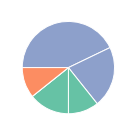

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(2,2))
ps,ts = ax.pie(data, colors=colors, wedgeprops={'linewidth':1,'edgecolor':'w'},
               startangle=180,counterclock=False)
fig.tight_layout()
#fig.savefig(resultpath + '230630_f3b__bp-11.pdf')

In [108]:
PAIRS = ['CG','GC','AU','UA','GU','UG']
bps10 = [bg3seq[m][1] for m in bg3ms]
data = [bps10.count(bp) for bp in PAIRS]
print zip(PAIRS,data)
colors = ['#8da0cb','#8da0cb','#66c2a5','#66c2a5','#fc8d62','#fc8d62']

[('CG', 19), ('GC', 2), ('AU', 4), ('UA', 2), ('GU', 1), ('UG', 0)]


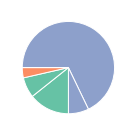

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(2,2))
ps,ts = ax.pie(data, colors=colors, wedgeprops={'linewidth':1,'edgecolor':'w'},
               startangle=180,counterclock=False)
fig.tight_layout()
#fig.savefig(resultpath + '230630_f3b__bp-11.pdf')

In [112]:
bg3s = [bg3seq[m][2] for m in bg3ms if len(bg3seq[m][2])==1]
data = [bg3s.count(n) for n in 'CGAU']+[len(bg3ms)-len(bg3s)]
colors = ['#7570b3','#7570b3','#1b9e77','#1b9e77','#969696']
print zip(['C','G','A','U','>=2'],data)

[('C', 2), ('G', 1), ('A', 7), ('U', 13), ('>=2', 5)]


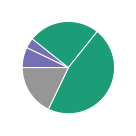

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(2,2))
ps,ts = ax.pie(data, colors=colors, wedgeprops={'linewidth':1,'edgecolor':'w'},
               startangle=180,counterclock=False)
fig.tight_layout()
#fig.savefig(resultpath + '230630_f3b__bulge.pdf')

In [115]:
seq5s = pd.DataFrame(columns=range(3),index=list('ACGU')).fillna(0)
seq3s = pd.DataFrame(columns=range(3),index=list('ACGU')).fillna(0)

seq5s[0] = pd.Series(Counter([bg3seq[m][0][0] for m in bg3ms]))
seq5s[2] = pd.Series(Counter([bg3seq[m][1][0] for m in bg3ms]))

seq3s[0] = pd.Series(Counter([bg3seq[m][0][1] for m in bg3ms]))
seq3s[1] = pd.Series(Counter([bg3seq[m][2] for m in bg3ms if len(bg3seq[m][2])==1]))
seq3s[2] = pd.Series(Counter([bg3seq[m][1][1] for m in bg3ms]))

(-0.5, 2.5, 0.0, 1.0)

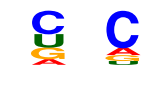

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(2,1))
for i in range(3):
    freq = seq5s[i].sort_values()
    freq = freq/sum(freq)
    bottom = 0
    for nuc,f in freq.items():
        letterAt(nuc,i,bottom,f,ax=ax)
        bottom+=f
        
ax.set_xlim(-.5,2.5)
ax.axis('off')
#fig.savefig(resultpath + '220530_f3c__3bg5p.pdf')

(-0.5, 2.5, 0.0, 1.0)

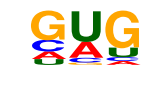

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(2,1))
for i in range(3):
    freq = seq3s[i].sort_values()
    freq = freq/sum(freq)
    bottom = 0
    for nuc,f in freq.items():
        letterAt(nuc,i,bottom,f,ax=ax)
        bottom+=f
        
ax.set_xlim(-.5,2.5)
ax.axis('off')
#fig.savefig(resultpath + '220530_f3c__3bg3p.pdf')

### 3E. In vitro processing results of pri-miRNAs with and without the GWG bulge.

In [132]:
gug = [m for m in bg3ms if bg3seq[m][0] in 'CG UG' and bg3seq[m][1] in 'CG UG' and bg3seq[m][2]=='U']
gag = [m for m in bg3ms if bg3seq[m][0] in 'CG UG' and bg3seq[m][1] in 'CG UG' and bg3seq[m][2]=='A']
print len(gug), len(gag)

5 4


In [133]:
msl = [gug,gag,[m for m in bg3ms if m not in gug+gag],[m for m in folded if m not in bg3ms]]
print map(len,msl)
pes = [[releffs[m] for m in ms] for ms in msl]
phs = [[relhoms[m] for m in ms] for ms in msl]
xs = np.arange(len(msl))
ys1 = map(np.average,pes)
es1 = map(sem,pes)
ys2 = map(np.average,phs)
es2 = map(sem,phs)
labels = ['GUG\n', 'GAG\n','Else\n', 'No bulge\n']
labels = ['%s(%s)'%(l,len(pe)) for l,pe in zip(labels,pes)]
print mannwhitneyu(pes[0],pes[-1])[1]*2, mannwhitneyu(phs[0],phs[-1])[1]*2
print mannwhitneyu(pes[1],pes[-1])[1]*2, mannwhitneyu(phs[1],phs[-1])[1]*2

[5, 4, 19, 448]
0.0011552832987924365 0.017047468125487634
0.020252593098148253 0.022953867895450095


Text(0,0.5,u'Cleavage homogeneity')

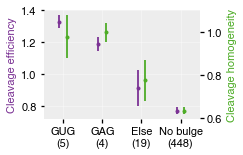

In [134]:
fig,ax = plt.subplots(1,1,figsize=(2.8,2))
ax.errorbar(xs-.1,ys1,yerr=es1,lw=0,elinewidth=1.8,ms=3,marker='o',color='#7b3294')
axt = ax.twinx()
axt.errorbar(xs+.1,ys2,yerr=es2,lw=0,elinewidth=1.8,ms=3,marker='o',color='#4dac26')
ax.set_xlim(min(xs)-.5,max(xs)+.5)
ax.set_xticks(xs)
ax.set_xticklabels(labels)
ax.grid(ls='-',lw=.7,color='w')
for a in [ax,axt]:
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    ax.tick_params(left='on')
axt.tick_params(left='off',right='on')
ax.set_facecolor('#ededed')
#ax.set_xlabel('3p bulge at %i'%(bulgepos+1))
ax.set_ylabel('Cleavage efficiency',color='#7b3294')
axt.set_ylabel('Cleavage homogeneity',color='#4dac26')
#fig.savefig(resultpath + '230703_3bg_processing.pdf')#,dpi=300)

### 4. In vitro processing results of artificial pri-miRNAs with and without the GWG bulge.

In [136]:
from scipy.stats import ttest_ind

In [137]:
## pri-watson
wbg = 1-np.array([.718694, .449249, .656882])
wobg = 1-np.array([.843303, .789091, .814812])
#rele = wbg/wobg
rele = [1.584909919,1.812051,1.742978726]

print mannwhitneyu(rele,[1,1,1],alternative='two-sided')
print ttest_ind(rele,[1,1,1],equal_var=False)

MannwhitneyuResult(statistic=9.0, pvalue=0.0636025696207536)
Ttest_indResult(statistic=10.610559485869153, pvalue=0.00876564227965999)


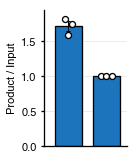

In [138]:
fig, ax = plt.subplots(1,1,figsize=(1.5,2.5))

bars = ax.bar([0,1],[np.average(rele),1],yerr=[sem(rele),0],width=.7,lw=1.3,
              zorder=2,edgecolor='k',facecolor='#1C75BC',capsize=2,
              error_kw={'zorder':3,'elinewidth':1} )
ax.scatter([0,-.1,.1],rele,zorder=4,edgecolor='k',facecolor='w',lw=1.3)
ax.scatter([.85,1,1.15],[1,1,1],zorder=4,edgecolor='k',facecolor='w',lw=1.3)
ax.set_ylabel('Product / Input')
ax.set_xticks([])
ax.set_yticks([0,.5,1,1.5])
ax.set_xlim(-.65,1.55)
ax.yaxis.grid(ls='-',lw=.5)
#fig.savefig('230228_f3f__ivp_results.pdf')

In [139]:
## pri-99a
wtpre = [1,1,1]
wtalt = [0.12861897,0.139850866,0.189150747]
mtpre = [1.028170455,1.003319373,1.150499708]
mtalt = [0.430024939,0.406061225,0.429761201]
print ttest_ind(wtpre,mtpre,equal_var=False)
print ttest_ind(wtalt,mtalt,equal_var=False)

Ttest_indResult(statistic=-1.3336222372812896, pvalue=0.3139269797767008)
Ttest_indResult(statistic=-13.326168537935736, pvalue=0.0015144504865046513)


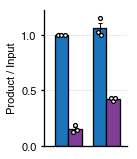

In [140]:
fig, ax = plt.subplots(1,1,figsize=(1.5,2.5))

bars = ax.bar([-.18,.82],[1,np.average(mtpre)],yerr=[0,sem(mtpre)],width=.36,lw=1.3,
              zorder=2,edgecolor='k',facecolor='#1C75BC',capsize=2,error_kw={'zorder':3,'elinewidth':1} )
ax.scatter([-.28,-.18,-.08],wtpre,zorder=4,edgecolor='k',facecolor='w',lw=1.3,s=15)
ax.scatter([.77,.87,.82],mtpre,zorder=4,edgecolor='k',facecolor='w',lw=1.3,s=15)

bars = ax.bar([.18,1.18],[np.average(wtalt),np.average(mtalt)],yerr=[sem(wtalt),sem(mtalt)],width=.36,lw=1.3,
              zorder=2,edgecolor='k',facecolor='#7F3F98',capsize=2,error_kw={'zorder':3,'elinewidth':1} )
ax.scatter([.13,.23,.18],wtalt,zorder=4,edgecolor='k',facecolor='w',lw=1.3,s=15)
ax.scatter([1.13,1.18,1.23],mtalt,zorder=4,edgecolor='k',facecolor='w',lw=1.3,s=15)

ax.set_ylabel('Product / Input')
ax.set_xticks([])
ax.set_yticks([0,.5,1])
ax.set_xlim(-.65,1.55)
ax.yaxis.grid(ls='-',lw=.5)
#fig.savefig('pri-mir-99a_ivp.pdf')

In [141]:
## pri-183
wtpre = [1,1,1]
wtalt = [0.333551239,0.345841362,0.307393604]
mtpre = [0.157290947,0.199679241,0.1373811]
mtalt = [0.210956684,0.24555534,0.15161773]
print ttest_ind(wtpre,mtpre,equal_var=False)
print ttest_ind(wtalt,mtalt,equal_var=False)

Ttest_indResult(statistic=45.46630302344321, pvalue=0.00048339897003118906)
Ttest_indResult(statistic=4.252694593940142, pvalue=0.030101983523266793)


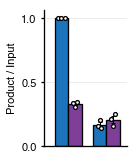

In [142]:
fig, ax = plt.subplots(1,1,figsize=(1.5,2.5))

bars = ax.bar([-.18,.82],[1,np.average(mtpre)],yerr=[0,sem(mtpre)],width=.36,lw=1.3,
              zorder=2,edgecolor='k',facecolor='#1C75BC',capsize=2,error_kw={'zorder':3,'elinewidth':1} )
ax.scatter([-.28,-.18,-.08],wtpre,zorder=4,edgecolor='k',facecolor='w',lw=1.3,s=15)
ax.scatter([.77,.82,.87],mtpre,zorder=4,edgecolor='k',facecolor='w',lw=1.3,s=15)

bars = ax.bar([.18,1.18],[np.average(wtalt),np.average(mtalt)],yerr=[sem(wtalt),sem(mtalt)],width=.36,lw=1.3,
              zorder=2,edgecolor='k',facecolor='#7F3F98',capsize=2,error_kw={'zorder':3,'elinewidth':1} )
ax.scatter([.13,.23,.18],wtalt,zorder=4,edgecolor='k',facecolor='w',lw=1.3,s=15)
ax.scatter([1.13,1.23,1.18],mtalt,zorder=4,edgecolor='k',facecolor='w',lw=1.3,s=15)

ax.set_ylabel('Product / Input')
ax.set_xticks([])
ax.set_yticks([0,.5,1])
ax.set_xlim(-.65,1.55)
ax.yaxis.grid(ls='-',lw=.5)
#fig.savefig('pri-mir-183_ivp.pdf')

In [146]:
## pri-99a
vector = [0.039921919,0.027429845,0.035124102]
wt = [1,1,1]
mut = [0.429215768,0.584856134,0.732546543]

In [149]:
xs_ve = np.array([-.15,0,.15])
xs_wt = np.array([-.15,0,.15])+1
xs_mu = np.array([0,0,0])+2

xs = [0,1,2]
ys = map(np.average,[vector,wt,mut])
es = map(sem,[vector,wt,mut])

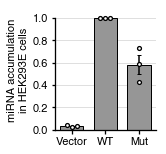

In [150]:
fig, ax = plt.subplots(1,1,figsize=(1.8,2.2))
ax.bar(xs,ys,yerr=es,edgecolor='k',lw=1,facecolor='#969696',capsize=2,error_kw={'zorder':3},zorder=2,width=.7)
ax.scatter(xs_ve,vector,facecolor='w',edgecolor='k',s=15,zorder=4,lw=1.3)
ax.scatter(xs_wt,wt,facecolor='w',edgecolor='k',s=15,zorder=4,lw=1.3)
ax.scatter(xs_mu,mut,facecolor='w',edgecolor='k',s=15,zorder=4,lw=1.3)
ax.set_ylabel('miRNA accumulation\nin HEK293E cells')
ax.set_xticks(xs)
ax.set_xticklabels(['Vector','WT','Mut'])
ax.set_yticks(np.arange(0,1.01,.2))
ax.yaxis.grid(ls='-')
ax.spines['left'].set_bounds(0,1)
#fig.savefig('pri-mir-99a.pdf')

In [151]:
## pri-183 in vivo
vector = [0.056766333, 0.041601174, 0.081547904]
wt = [1,1,1]
mut = [0.526034089, 0.74616148, 0.735339138]

In [152]:
xs_ve = np.array([-.15,0,.15])
xs_wt = np.array([-.15,0,.15])+1
xs_mu = np.array([0,-.075,.075])+2

xs = [0,1,2]
ys = map(np.average,[vector,wt,mut])
es = map(sem,[vector,wt,mut])

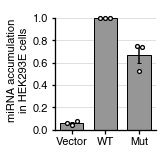

In [153]:
fig, ax = plt.subplots(1,1,figsize=(1.8,2.2))
ax.bar(xs,ys,yerr=es,edgecolor='k',lw=1,facecolor='#969696',capsize=2,error_kw={'zorder':3},zorder=2,width=.7)
ax.scatter(xs_ve,vector,facecolor='w',edgecolor='k',s=15,zorder=4,lw=1.3)
ax.scatter(xs_wt,wt,facecolor='w',edgecolor='k',s=15,zorder=4,lw=1.3)
ax.scatter(xs_mu,mut,facecolor='w',edgecolor='k',s=15,zorder=4,lw=1.3)
ax.set_ylabel('miRNA accumulation\nin HEK293E cells')
ax.set_xticks(xs)
ax.set_xticklabels(['Vector','WT','Mut'])
ax.set_yticks(np.arange(0,1.01,.2))
ax.yaxis.grid(ls='-')
ax.spines['left'].set_bounds(0,1)
#fig.savefig('pri-mir-183.pdf')